In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
food_consumption=pd.read_csv("food_consumption.csv")

In [4]:
# Filter for Belgium
be_consumption = food_consumption.query("country=='Belgium'")

# Filter for USA
usa_consumption = food_consumption.query("country=='USA'")

# Calculate mean and median consumption in Belgium
print(be_consumption.agg("mean"))
print(be_consumption.median())

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median())

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64


C:\Users\kevin\AppData\Local\Temp\ipykernel_11648\851895606.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(be_consumption.agg("mean"))
C:\Users\kevin\AppData\Local\Temp\ipykernel_11648\851895606.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(be_consumption.median())
C:\Users\kevin\AppData\Local\Temp\ipykernel_11648\851895606.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is de

In [5]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption["country"]=="Belgium") | (food_consumption["country"]=="USA")]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby("country")["consumption"].agg(["mean","median"]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


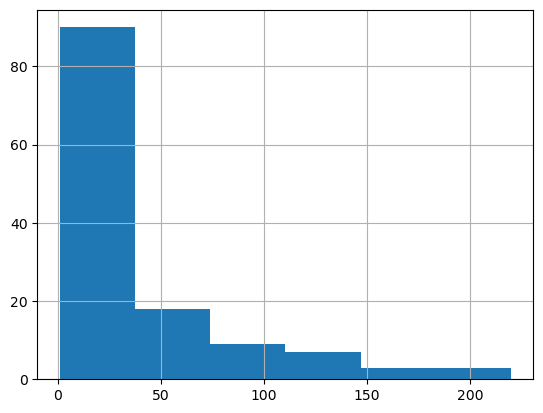

In [6]:

# Subset for food_category equals rice
rice_consumption =food_consumption[food_consumption["food_category"]=="rice"]

# Histogram of co2_emission for rice and show plot
rice_consumption["co2_emission"].hist(bins=6)
plt.show()


In [7]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption["co2_emission"].agg(["mean","median"]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


given this distribution is better to use the median

In [8]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption["co2_emission"],np.linspace(0,1,5)))

[   0.        5.21     16.53     62.5975 1712.    ]


In [9]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption["co2_emission"],np.linspace(0,1,6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [10]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption["co2_emission"],np.linspace(0,1,11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


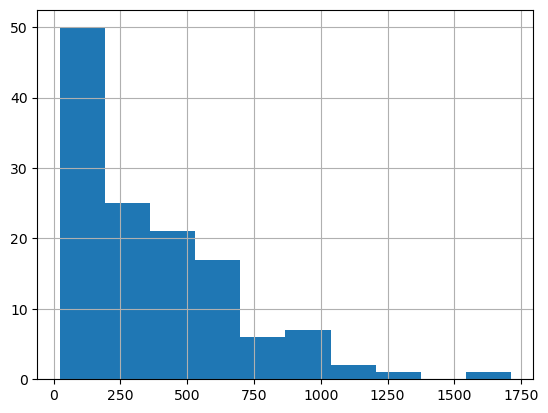

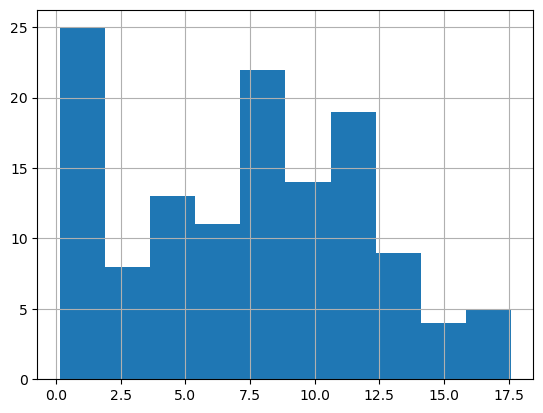

In [11]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby("food_category")["co2_emission"].agg(["var","std"]))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption["food_category"]=="beef"]["co2_emission"].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption["food_category"]=="eggs"]["co2_emission"].hist()
# Show plot
plt.show()

Finding outliers using IQR
Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than 
 or greater than 
, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

Diagram of a box plot showing median, quartiles, and outliers

In [13]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country>upper)|(emissions_by_country<lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
